In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties_outlier_treated.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ss residency,sector 6,0.48,5333.33,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54,300.000000
1,flat,ansal housing highland park,sector 103,1.10,6242.91,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87,587.333333
2,flat,sapphire eighty three,sector 83,0.65,9285.71,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0,700.000000
3,flat,unitech the residences,sector 33,1.35,8737.86,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49,515.000000
4,flat,m3m capital,sector 113,3.25,14142.73,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115,574.500000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

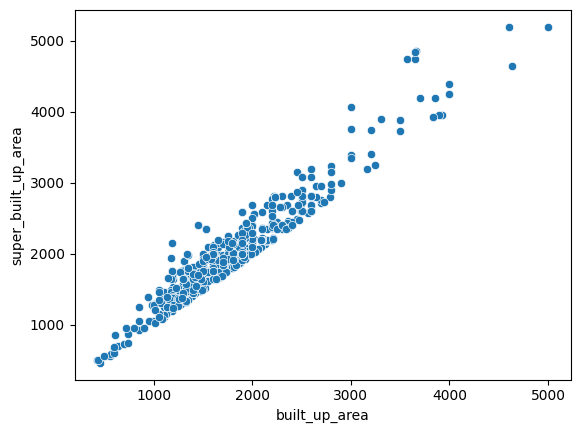

In [6]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

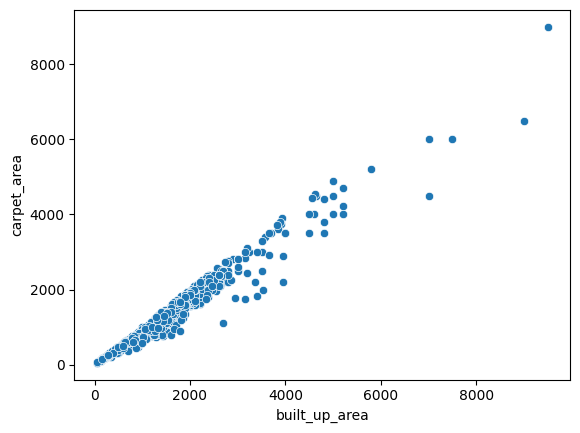

In [7]:
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')


In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(531, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,godrej oasis,sector 88a,1.29,7799.27,1654.0,Super Built up area 1629(151.34 sq.m.)Carpet a...,3,3,3,5.0,NaN,New Property,1629.0,NaN,1628.0,1,0,0,0,1,0,65,551.333333
12,flat,tulip violet,sector 69,1.50,10714.29,1400.0,Super Built up area 1578(146.6 sq.m.)Carpet ar...,3,3,2,8.0,North-East,Relatively New,1578.0,NaN,1400.0,0,0,0,1,0,1,174,466.666667
24,flat,imperia the esfera,sector 37c,0.99,5454.55,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3,4,3,9.0,North-East,Relatively New,1815.0,NaN,1510.0,0,1,0,0,0,0,49,605.000000
34,flat,shree vardhman victoria,sector 70,1.50,7692.31,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,5,3,7.0,South,Relatively New,1950.0,NaN,1161.0,0,1,0,0,0,1,174,650.000000
46,flat,dlf regal gardens,sector 90,1.26,7403.06,1702.0,Super Built up area 1702(158.12 sq.m.)Carpet a...,3,3,3,6.0,North-East,Relatively New,1702.0,NaN,1500.0,0,0,0,0,1,1,28,567.333333


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2864\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,unitech the residences,sector 33,1.35,8737.86,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49,515.000000
5,flat,experion windchants,sector 112,4.75,12622.91,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,1,42,1254.333333
6,flat,ss the coralwood,sector 84,1.10,5820.11,1890.0,Super Built up area 1890(175.59 sq.m.),3,3,3+,12.0,East,Moderately Old,1890.0,NaN,NaN,0,0,0,0,0,1,104,630.000000
9,flat,chd avenue,sector 71,1.16,6655.19,1743.0,Super Built up area 1743(161.93 sq.m.),3,3,3,5.0,South-West,Moderately Old,1743.0,NaN,NaN,0,1,0,0,0,1,73,581.000000
10,flat,m3m merlin,sector 67,3.40,14419.00,2358.0,Super Built up area 2358(219.07 sq.m.),3,4,3,17.0,North,Relatively New,2358.0,NaN,NaN,0,1,0,0,0,1,174,786.000000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2864\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ss residency,sector 6,0.48,5333.33,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54,300.000000
4,flat,m3m capital,sector 113,3.25,14142.73,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115,574.500000
7,house,raj villas,sector 52,8.00,25542.78,3132.0,Carpet area: 348 (290.97 sq.m.),6,5,3+,4.0,East,Undefined,NaN,NaN,348.0,0,0,0,0,0,0,0,522.000000
11,flat,essel tower,sector 28,2.20,12500.00,1760.0,Carpet area: 1760 (163.51 sq.m.),3,4,3+,3.0,NaN,Moderately Old,NaN,NaN,1760.0,0,1,0,0,0,2,0,586.666667
16,house,independent,sector 21,0.45,8411.21,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,0,0,178.333333


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2864\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

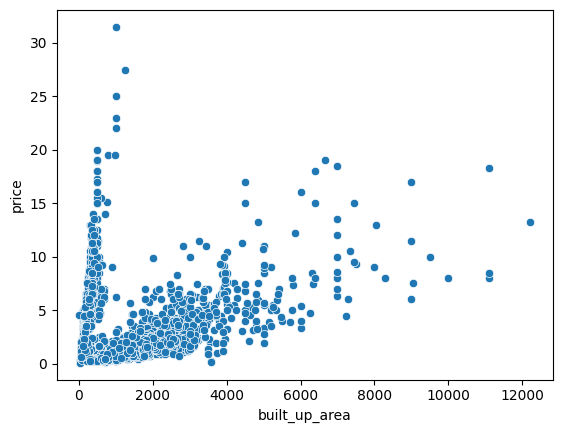

In [29]:
sns.scatterplot(data=df, x='built_up_area', y='price')


In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
976,4.70,2368.0,170.0
3315,2.85,1950.0,1920.0
2706,7.25,2475.0,275.0
1794,6.00,1710.0,1778.0
2550,10.00,2700.0,300.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

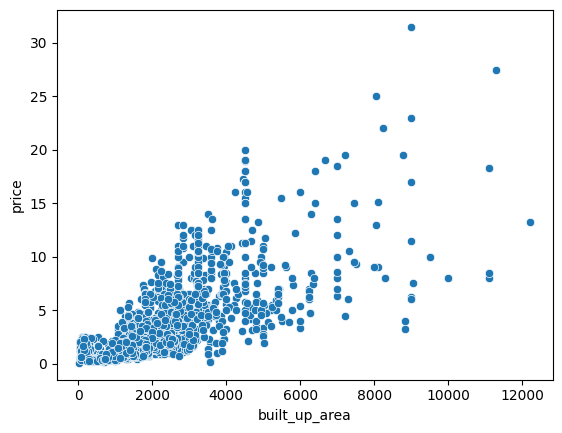

In [34]:
sns.scatterplot(data=df, x='built_up_area', y='price')


In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()


,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.33,3,2,2,2.0,NaN,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.91,3,3,3+,7.0,North-East,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9285.71,1,1,0,6.0,NaN,Undefined,700.0,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.86,3,4,2,8.0,North-East,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.73,4,4,3+,34.0,NaN,Under Construction,2553.0,1,1,0,1,0,0,115


In [37]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
144,house,independent,sector 7,6.50,15046.30,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
149,house,independent,sector 4,4.12,8888.89,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1177,house,independent,sector 26,4.60,12198.36,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1199,house,dlf new town heights,sector 86,2.47,7718.75,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
1206,flat,NaN,sector 78,0.60,3692.31,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1386,house,vipul tatvam villa,sector 48,8.50,26234.57,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1800,house,jacob pura,sector 12,0.35,9722.22,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2024,flat,experion heartsong,dwarka expressway,1.08,6150.34,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
2029,house,emaar mgf marbella,sector 66,9.00,21251.48,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
2347,house,independent,sector 25,13.00,45710.27,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)


In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.2843881856540084

# facing

<Axes: ylabel='count'>

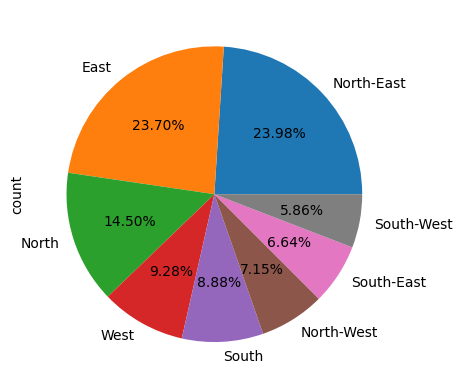

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2601,flat,shapoorji pallonji joyville,sector 102,1.10,12021.86,2,2,1,7.0,Undefined,915.0,0,0,0,0,0,0,0
186,flat,zara aavaas,sector 104,0.22,7308.97,1,2,2,2.0,New Property,335.0,0,0,0,0,0,0,60
2240,house,independent,sohna road road,1.20,22304.83,1,4,3+,4.0,Old Property,50.0,0,0,0,0,0,0,8
847,house,independent,sector 13,0.45,4807.69,1,1,0,1.0,Undefined,936.0,0,0,0,0,0,0,0
1308,flat,ss the leaf,sector 85,1.75,7267.44,3,4,3,8.0,Relatively New,2179.0,0,1,0,0,0,0,49


In [46]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [48]:
df[df['society'].isnull()].index


Index([1206], dtype='int64')

In [49]:
df.drop(index=[1206],inplace=True)

In [50]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [51]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [52]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,sapphire eighty three,sector 83,0.65,9285.71,1,1,0,6.0,Undefined,700.0,0,0,0,0,0,0,0
7,house,raj villas,sector 52,8.00,25542.78,6,5,3+,4.0,Undefined,3132.0,0,0,0,0,0,0,0
13,flat,smart world gems,sector 89,1.71,12000.00,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,0,45
16,house,independent,sector 21,0.45,8411.21,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,0,0
30,house,ansal celebrity homes,sector 2,5.20,10000.00,4,5,2,1.0,Undefined,5200.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,house,independent,sector 3,0.68,3874.64,5,3,0,1.0,Undefined,1755.0,0,0,0,0,0,0,0
3537,house,independent,sector 11,1.80,8078.99,8,5,2,1.0,Undefined,2476.0,0,0,0,0,0,0,0
3545,flat,smart world orchard,sector 61,2.50,16139.44,3,3,1,1.0,Undefined,1549.0,0,0,0,0,0,0,61
3547,house,project housing board colony,sector 28,2.58,17695.47,4,2,2,2.0,Undefined,1458.0,0,0,0,0,0,0,0


In [53]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           597
Moderately Old         583
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [59]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']


In [60]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)


In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1727
New Property           598
Moderately Old         590
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [62]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [63]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1729
Moderately Old         621
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [65]:
df.isnull().sum()


property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [66]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [67]:
df.shape

(3554, 18)